# 7주차

Convolution Neural Network

- 3가지의 layer로 구성
    - Convolution (앞) - feature extraction
    - Pooling lyaer (앞) - feature extraction
    - Fully-connected layer (뒤) - classification

- Filters always extend the full channel of the input volume
    
    **; input의 채널이 filter의 채널과 항상 같아야 함.** 
    
    ![image](https://user-images.githubusercontent.com/92504386/202983773-19bb60ab-0479-4468-bf5e-baec5c0a4d07.png)
    
    filter 연산을 통해 75개의 값을 하나의 값으로 출력.
    
    ![image](https://user-images.githubusercontent.com/92504386/202984011-84691ae7-b8b7-4d6d-ba3f-10d93203223a.png)
    
    출력값들을 모으면 28*28 Feature map(=Activation map) 한장이 결과로 나옴. 
    
    ![image](https://user-images.githubusercontent.com/92504386/202984104-898d4fea-3b34-4510-86dd-c13fc5c3a407.png)
    
- convolution filter 여러개를 통해 out feature map 여러 장을 만들어 냄
- **Output featuremap의 채널 수 = 사용한 convolution filter 개수**

`2D Convolution의 의미`

: input과 filteror output값이 2D라는 것이 아니라, 연산을 할 때 가로, 세로로만 연산을 하기 때문에 2D convolution 이라고 함. 

실제 tensor에서는 4D 형태임.

`Stride` 

: 한번 convolution 하고 나서 몇 칸 이동해서 convolution을 할건지 정해주는 option

`Zero Padding`

: convolution 연산을 반복하다보면 이미지가 줄어들게 되는데, 이때 layer를 깊게 쌓을 때 문제가 됨, 따라서 주변을 0으로 padding 함으로써 입출력 사이즈가 변하지 않고, 사이즈가 유지 됨. 

Padding

- valid - no padding
- same - padding such that feature map size has  [I/S]    (*s: stride i: input)

`Relu`

: 음수 → 양수

양수 → 그대로 통과 

**convolution filter 4D 형태** 

`[height, width, input_channel, ouput_channel]`

---

## NN Implementation 순서

![image](https://user-images.githubusercontent.com/92504386/202984261-6c30aa20-16a6-46c4-a83f-a046d136bb2d.png)


# lab11-0-1,2

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


(1, 3, 3, 1)


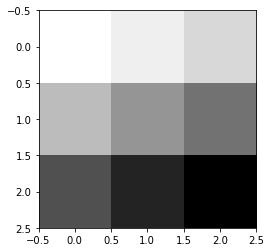

In [15]:
#TOY IMAGE

image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show() 
# batch, height, width, channel -> 4차원 tensor

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


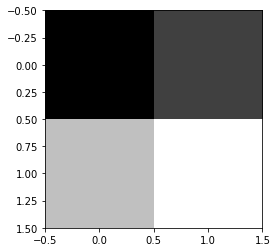

In [16]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


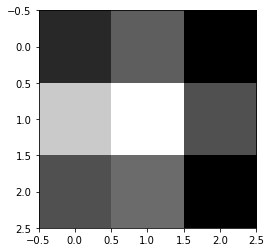

In [17]:
# input과 동일하게 하기 위해 padding = same 옵션 추가


print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


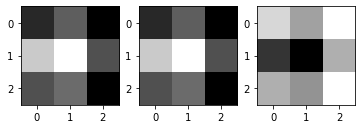

In [18]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

# MAX POOLING

In [9]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


# Zero padding : Same

In [19]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


# mnist DATASET으로 예제


In [23]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

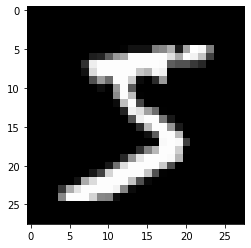

In [24]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


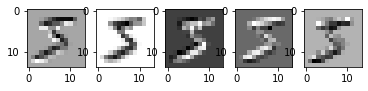

In [25]:
# 4차원으로 변형, 맨 앞 batchsize 자동 할당 -1

img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)

#initializer는 random initializer 사용
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', 
                             kernel_initializer=weight_init)(img)

# 28*28 -> 14 *14 로 변형됨

print(conv2d.shape)


feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()



# pooling 연산


(1, 7, 7, 5)


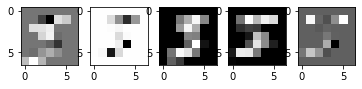

In [28]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

resolution 절반으로 떨어짐

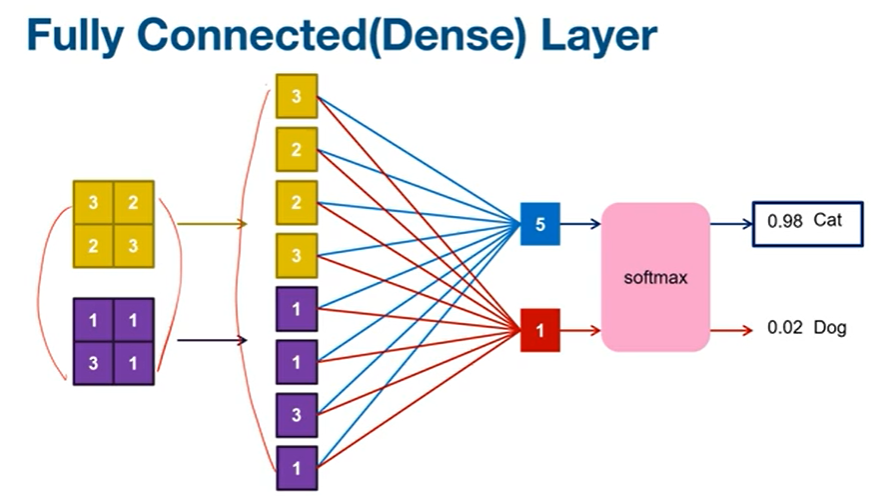

### CNN


Convolutional Nueral Network는 convolution layer 와 pooling layer 를 통해 feature를 뽑아내는 feature extraction을 수행하고 , 마지막에 fully connected layer를 통해 classification을 해냄. 



image에 가까운 layer에서는 low-level feature extraction으로 
단순한 형태의 색, 선, 곡선을 뽑아냄

중간에서는 이를 모아서 Mid-level feature로 좀더 복잡하게 뽑고

끝에서는 high-level feature를 뽑고,

마지막 fully connected layer를 통해 최종 classificaiton을 함.

# LAB 11-1-1

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [31]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

In [33]:
## MNIST Dataset 
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_seq'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [36]:
# Model function

def create_model():
    # layer 순서 sequential 하게 쌓음.
    model = keras.Sequential()
    
    
    # layer 순서 
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(28, 28, 1)))
    
    
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model

In [41]:
model = create_model()
model.summary() # 모델이 잘 되는지 확인/

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 128)       

In [51]:
# loss function

def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
            logits=logits, labels=labels))    
    return loss   



# gradient calculate

def grad(model, images, labels):
    with tf.compat.v1.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)


# accuracy

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy



#optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return accuracy



In [52]:
checkpoint = tf.train.Checkpoint(cnn=model)

In [53]:
for epoch in range(training_epochs):
    
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    
    for images, labels in train_dataset:
        grads = grad(model, images, labels)
        optimizer.apply_gradients(zip(grads, model.variables))
        
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        
        avg_train_acc = avg_train_acc + acc
        
        train_step += 1 
        
    avg_loss = avg_loss / train_step
    
    avg_train_acc = avg_train_acc / train_step
    
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Epoch: 1 loss = 0.18600260 train accuracy =  0.9547 test accuracy =  0.9865
Epoch: 2 loss = 0.04675154 train accuracy =  0.9893 test accuracy =  0.9887
Epoch: 3 loss = 0.03221626 train accuracy =  0.9931 test accuracy =  0.9900
Epoch: 4 loss = 0.02449683 train accuracy =  0.9951 test accuracy =  0.9898
Epoch: 5 loss = 0.01866037 train accuracy =  0.9965 test accuracy =  0.9920
Epoch: 6 loss = 0.01588534 train accuracy =  0.9972 test accuracy =  0.9924
Epoch: 7 loss = 0.01259457 train accuracy =  0.9980 test accuracy =  0.9893
Epoch: 8 loss = 0.01126165 train accuracy =  0.9982 test accuracy =  0.9928
Epoch: 9 loss = 0.00945018 train accuracy =  0.9987 test accuracy =  0.9919
Epoch: 10 loss = 0.00778210 train accuracy =  0.9989 test accuracy =  0.9931
Epoch: 11 loss = 0.00673255 train accuracy =  0.9990 test accuracy =  0.9936
Epoch: 12 loss = 0.00607010 train accuracy =  0.9992 test accuracy =  0.9928
Epoch: 13 loss = 0.00632632 train accuracy =  0.9994 test accuracy =  0.9916
Epoch: 1

# LAB 11-2

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [4]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)


cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_func'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [6]:
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10)(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [7]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856 

In [8]:
# loss function

def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
            logits=logits, labels=labels))    
    return loss   



# gradient calculate

def grad(model, images, labels):
    with tf.compat.v1.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)


# accuracy

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy



#optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return accuracy



In [10]:
checkpoint = tf.train.Checkpoint(cnn=model)

In [11]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        grads = grad(model, images, labels)                
        optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.04738465 train accuracy =  0.9896 test accuracy =  0.9919
Epoch: 2 loss = 0.03293478 train accuracy =  0.9931 test accuracy =  0.9916
Epoch: 3 loss = 0.02364706 train accuracy =  0.9949 test accuracy =  0.9922
Epoch: 4 loss = 0.01813071 train accuracy =  0.9966 test accuracy =  0.9923
Epoch: 5 loss = 0.01741781 train accuracy =  0.9972 test accuracy =  0.9916
Epoch: 6 loss = 0.01284691 train accuracy =  0.9980 test accuracy =  0.9935
Epoch: 7 loss = 0.01184971 train accuracy =  0.9981 test accuracy =  0.9921
Epoch: 8 loss = 0.00851295 train accuracy =  0.9988 test accuracy =  0.9913
Epoch: 9 loss = 0.00807289 train accuracy =  0.9991 test accuracy =  0.9929
Epoch: 10 loss = 0.00712491 train accuracy =  0.9991 test accuracy =  0.9934
Epoch: 11 loss = 0.00811602 train accuracy =  0.9992 test accuracy =  0.9934
Epoch: 12 loss = 0.00521621 train accuracy =  0.9994 test accuracy =  0.9934
Epoch: 13 loss = 0.00429902 train accuracy =  0.

# LAB 11-3

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [13]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)


cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_func'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [14]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [15]:
model = MNISTModel()
temp_inputs = keras.Input(shape=(28, 28, 1))
model(temp_inputs)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d_3 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_4 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           multiple                  73856     
                                                                 
 max_pooling2d_5 (MaxPooling  multiple                 

In [16]:
# loss function

def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
            logits=logits, labels=labels))    
    return loss   



# gradient calculate

def grad(model, images, labels):
    with tf.compat.v1.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)


# accuracy

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy



#optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return accuracy



In [17]:
checkpoint = tf.train.Checkpoint(cnn=model)

In [ ]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        grads = grad(model, images, labels)                
        optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.17557946 train accuracy =  0.9591 test accuracy =  0.9863
Epoch: 2 loss = 0.04556618 train accuracy =  0.9897 test accuracy =  0.9903
Epoch: 3 loss = 0.03153737 train accuracy =  0.9937 test accuracy =  0.9921


# LAB 11-4

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)


cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_func'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [ ]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [ ]:
models = []
num_models = 3
for m in range(num_models):
    models.append(MNISTModel())

In [ ]:
# loss function

def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
            logits=logits, labels=labels))    
    return loss   



# gradient calculate

def grad(model, images, labels):
    with tf.compat.v1.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)


# accuracy

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy



#optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return accuracy



In [ ]:
checkpoints = []
for m in range(num_models):
    checkpoints.append(tf.train.Checkpoint(cnn=models[m]))

In [ ]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        for model in models:
            grads = grad(model, images, labels)                
            optimizer.apply_gradients(zip(grads, model.variables))
            loss = loss_fn(model, images, labels)
            avg_loss += loss / num_models
        acc = evaluate(models, images, labels)
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(models, images, labels)        
        avg_test_acc += acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    
    for idx, checkpoint in enumerate(checkpoints):
        checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

print('Learning Finished!')